In [2]:
import pandas as pd 
import numpy as np

In [3]:
graph = pd.read_csv("graph_metadata.csv")
graph = graph.drop(columns="Unnamed: 0")
# Reverse mapping: numbers to colors
community_reverse_mapping = {
    1: "Turquoise",
    2: "Yellow",
    3: "Purple",
    4: "Red",
    5: "Blue",
    6: "Orange",
    7: "Green"
}

# Create the 'comm_color' column and insert it right after the 'community' column
graph.insert(
    graph.columns.get_loc('community') + 1,  # Get the index right after 'community'
    'comm_color',  # New column name
    graph['community'].map(community_reverse_mapping)  # Mapped values
)

In [26]:
connected_features

42     100e42177aef80a479069abee89e4183
132    d809e87b2673775a4fff4dcdf4606e85
163    613523fa0b30b675f218503d1c630157
165    99b411a53ccea764f8f4c1686fc2dc83
176    03eddcd6fef09c0ad1b02e6e42feb73c
209    10ad1fff4332a0f979c90aabc7c625b5
224    d80aa06ab0d5080c492fee175b079c22
Name: feature ID, dtype: object

In [19]:
graph.sort_values(by='degree', ascending=False).iloc[0:20,:]

,node,feature ID,degree,betweenness,closeness,data_type,community,comm_color,Domain,Phylum,Class,Order,Family,Genus,Species,mean_abundance,mean_abundance_ranking
2,3,0b0a4bdddb823efeb9984bf862fe81f8,32,0.072156,0.417476,Microbial Taxa,2,Yellow,d__Bacteria,p__Firmicutes,c__Negativicutes,o__Selenomonadales,f__Veillonellaceae,g__Veillonella,s__Veillonella_unclassified,0.056886,3.0
6,9,e73c0fa69ad4221f822e2e5dcb920e76,32,0.085943,0.425041,Microbial Taxa,3,Purple,d__Bacteria,p__Fusobacteria,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium_unclassified,0.014041,7.0
53,57,c46f6aed459223ef41f57017ec797d41,27,0.051425,0.403125,Microbial Taxa,2,Yellow,d__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Lachnoanaerobaculum,s__Lachnoanaerobaculum_unclassified,0.003491,55.0
60,65,994d6bb787282e16ab078f43fb5e077d,26,0.029657,0.393293,Microbial Taxa,3,Purple,d__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Family_XI,g__Parvimonas,s__Parvimonas_unclassified,0.002692,62.0
42,46,100e42177aef80a479069abee89e4183,26,0.042582,0.406940,Microbial Taxa,3,Purple,d__Bacteria,p__Firmicutes,c__Negativicutes,o__Selenomonadales,f__Veillonellaceae,g__Veillonella,s__Veillonella_unclassified,0.004345,44.0
35,39,0e86d47168e5c995f8990779c9c5b51a,24,0.029938,0.386807,Microbial Taxa,3,Purple,d__Bacteria,p__Firmicutes,c__Negativicutes,o__Selenomonadales,f__Veillonellaceae,g__Veillonella,s__Veillonella_unclassified,0.005096,35.0
94,102,dbfa00e64a3c894c18b5418bffdf3a44,23,0.024105,0.386807,Microbial Taxa,2,Yellow,d__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Stomatobaculum,s__Stomatobaculum_unclassified,0.001316,89.0
14,17,a5bd85f6c3b255b5c6b24e6edea3f328,21,0.031080,0.392097,Microbial Taxa,3,Purple,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__Streptococcus_parasanguinis,0.010496,15.0
37,41,d5fdbb2924288ee9a63a8e2ef02b3d3b,20,0.055207,0.387970,Microbial Taxa,2,Yellow,d__Bacteria,p__Patescibacteria,c__Saccharimonadia,o__Saccharimonadales,f__Saccharimonadaceae,g__Saccharimonadaceae_unclassified,s__Saccharimonadaceae_unclassified,0.004538,40.0
212,223,e88f240b23f0455003715a18cb18e83f,19,0.022867,0.339921,Microbial Taxa,5,Blue,d__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Tannerellaceae,g__Tannerella,s__Tannerella_forsythia,0.000143,211.0


In [4]:
top10 = graph.sort_values(by='degree', ascending=False).iloc[0:10,:]

In [5]:
top_5_by_community = graph.groupby('community').apply(lambda x: x.nlargest(5, 'degree')).reset_index(drop=True)


C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_15356\643924596.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_by_community = graph.groupby('community').apply(lambda x: x.nlargest(5, 'degree')).reset_index(drop=True)


In [6]:
connected_species = graph[graph["node"].isin([236,46,219,172,140,174,185])]

In [7]:
connected_cpgs_graph = graph[graph["data_type"]=="CpG Site"]
connected_cpgs = ["PC21", "PC34", "PC48", "PC70", "PC75"]
pc_scores = pd.read_csv("pca_scores_first_100_components.csv")
connected_pcs = pc_scores.loc[:, connected_cpgs]

In [8]:
simper = pd.read_csv("simper.csv")
simper = simper.drop(columns="Unnamed: 0")

In [9]:
simper_top15 = simper.sort_values(by="average", ascending=False)[simper["p"]<0.05][0:15]

C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_15356\390521242.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  simper_top15 = simper.sort_values(by="average", ascending=False)[simper["p"]<0.05][0:15]


In [170]:
asvs_clr = pd.read_csv("ASV_CLR.csv")
taxonomy = pd.read_excel("../Summary/summary/6_taxonomy_community/feature_taxonomy_split.xlsx")
asvs = pd.read_csv("../Linux/cleaned_asv_reads.csv")
asv_tss = asvs.div(asvs.sum(axis=1), axis=0)


In [127]:
simper[simper["Genus"] == 'g__Abiotrophia']

,average,sd,ratio,ava,avb,cumsum,p,neg_log_p,Species,Genus,Family,ASV,mean_abundance
53,2.908936e-03,0.004222,0.689056,0.003588,0.004433,0.562459,0.115,0.939302,s__uncultured_Abiotrophia_sp.,g__Abiotrophia,f__Aerococcaceae,becd8488d5c722efbb395eea7aa2b7a2,4.010360e-03
309,2.478795e-04,0.000457,0.542971,0.000271,0.000326,0.840420,0.425,0.371611,s__uncultured_Abiotrophia_sp.,g__Abiotrophia,f__Aerococcaceae,03eddcd6fef09c0ad1b02e6e42feb73c,2.986474e-04
1893,1.546639e-05,0.000067,0.231338,0.000018,0.000014,0.964569,0.717,0.144481,s__Abiotrophia_defectiva,g__Abiotrophia,f__Aerococcaceae,2d080343971ae99c9a7b7952e9fbdeee,1.582753e-05
1912,1.523707e-05,0.000108,0.140648,0.000025,0.000006,0.964962,0.671,0.173277,s__Abiotrophia_defectiva,g__Abiotrophia,f__Aerococcaceae,92ba20a26edae477baa9cd373d8fdafb,1.535144e-05
6348,1.544732e-06,0.000014,0.113746,0.000003,0.000000,0.995720,0.001,3.000000,s__uncultured_Abiotrophia_sp.,g__Abiotrophia,f__Aerococcaceae,eba57d231d234052820888aa4fa21ee3,1.544732e-06
7597,9.237061e-07,0.000012,0.080320,0.000002,0.000000,0.997750,0.001,3.000000,s__Abiotrophia_defectiva,g__Abiotrophia,f__Aerococcaceae,f39cf193f45480d6db47c37ca3fb10ec,9.237061e-07
7803,8.456621e-07,0.000010,0.080581,0.000000,0.000002,0.997996,0.001,3.000000,s__uncultured_Abiotrophia_sp.,g__Abiotrophia,f__Aerococcaceae,3410607147d5170c83ef5d450079a6b4,8.456621e-07
7989,7.742853e-07,0.000010,0.080320,0.000002,0.000000,0.998198,0.001,3.000000,s__uncultured_Abiotrophia_sp.,g__Abiotrophia,f__Aerococcaceae,e41459b872844c37542469351ae91637,7.742853e-07
8511,6.160234e-07,0.000008,0.080581,0.000000,0.000001,0.998685,0.001,3.000000,s__uncultured_Abiotrophia_sp.,g__Abiotrophia,f__Aerococcaceae,88e3e66e08bd1e73fbcc019506f5f3b6,6.160234e-07


In [128]:
# Getting actual abundance data for all of these
veillonella_features = taxonomy[taxonomy['Family'] == "f__Veillonellaceae"]['feature ID']
prevotella_features = taxonomy[taxonomy['Family'] == "f__Prevotellaceae"]['feature ID']
selon_features = taxonomy[taxonomy['Family'] == "f__Selenomonadaceae"]['feature ID']
rothia_features = taxonomy[taxonomy['Family'] == "f__Micrococcaceae"]['feature ID']
abio_features = taxonomy[taxonomy['Family'] == "f__Aerococcaceae"]['feature ID']
capno_features = taxonomy[taxonomy['Family'] == "f__Flavobacteriaceae"]['feature ID']
top10_features = top10["feature ID"]
top5_comm_features = top_5_by_community["feature ID"]
simper_features = simper_top15["ASV"]
connected_features = connected_species["feature ID"]

#genus level
selon_genus_features = taxonomy[taxonomy['Genus'] == "g__Selenomonas"]['feature ID']
veill_genus_features = taxonomy[taxonomy['Genus'] == "g__Veillonella"]['feature ID']
dialister_genus_features = taxonomy[taxonomy['Genus'] == "g__Dialister"]['feature ID']
capno_genus_features = taxonomy[taxonomy['Genus'] == "g__Capnocytophaga"]['feature ID']
prevotella_genus_features = taxonomy[taxonomy['Genus'] == "g__Prevotella_7"]['feature ID']
rothia_genus_features = taxonomy[taxonomy['Genus'] == "g__Rothia"]['feature ID']
abiotrophia_genus_features = taxonomy[taxonomy['Genus'] == "g__Abiotrophia"]['feature ID']



# Filtering the asvs DataFrame to keep only the columns that match the 'feature ID' values
veillonella_asvs = asvs_clr[asvs_clr.columns.intersection(veillonella_features)]
prevotella_asvs = asvs_clr[asvs_clr.columns.intersection(prevotella_features)]
selon_asvs = asvs_clr[asvs_clr.columns.intersection(selon_features)]
top10_asvs = asvs_clr[asvs_clr.columns.intersection(top10_features)]
top5_comm_asvs = asvs_clr[asvs_clr.columns.intersection(top5_comm_features)]
simper_asvs = asvs_clr[asvs_clr.columns.intersection(simper_features)]
veil_family = veillonella_asvs.sum(axis=1)
prev_family = prevotella_asvs.sum(axis=1)

# Filtering the asv_tss DataFrame to keep only the columns that match the 'feature ID' values
veillonella_asvs_tss = asv_tss[asv_tss.columns.intersection(veillonella_features)]
prevotella_asvs_tss = asv_tss[asv_tss.columns.intersection(prevotella_features)]
selon_asvs_tss = asv_tss[asv_tss.columns.intersection(selon_features)]
rothia_asvs_tss = asv_tss[asv_tss.columns.intersection(rothia_features)]
abio_asvs_tss   = asv_tss[asv_tss.columns.intersection(abio_features)]
capno_asvs_tss  = asv_tss[asv_tss.columns.intersection(capno_features)]
top10_asvs_tss = asv_tss[asv_tss.columns.intersection(top10_features)]
top5_comm_asvs_tss = asv_tss[asv_tss.columns.intersection(top5_comm_features)]
simper_asvs_tss = asv_tss[asv_tss.columns.intersection(simper_features)]
connected_taxa_tss = asv_tss[asv_tss.columns.intersection(connected_features)]
veil_family_tss = veillonella_asvs_tss.sum(axis=1)
prev_family_tss = prevotella_asvs_tss.sum(axis=1)

#genus level
genus_selon_asvs_tss = asv_tss[asv_tss.columns.intersection(selon_genus_features)]
genus_veill_asvs_tss = asv_tss[asv_tss.columns.intersection(veill_genus_features)]
genus_dialister_asvs_tss = asv_tss[asv_tss.columns.intersection(dialister_genus_features)]
genus_capno_asvs_tss = asv_tss[asv_tss.columns.intersection(capno_genus_features)]
genus_prevotella_asvs_tss = asv_tss[asv_tss.columns.intersection(prevotella_genus_features)]
genus_rothia_asvs_tss = asv_tss[asv_tss.columns.intersection(rothia_genus_features)]
genus_abiotrophia_asvs_tss = asv_tss[asv_tss.columns.intersection(abiotrophia_genus_features)]



In [37]:
meta = pd.read_csv("../Metadata.csv")

In [256]:
import pandas as pd

# List of columns to calculate statistics for (excluding demogr_edu_level)
columns = [
    'phy_perf_sppbs_total_score_consolidated',
    'cog_mmse_totalscore',
    'func_stat_badl_total',
    'func_stat_iadl_score'
]

# Create an empty dictionary to store results
stats = {}

# Calculate mean and IQR range for each column
for col in columns:
    if col in meta.columns:
        median_value = meta[col].median()
        Q1 = meta[col].quantile(0.25)
        Q3 = meta[col].quantile(0.75)
        iqr_range = Q3 - Q1
        
        # Store the results in a dictionary
        stats[col] = {
            'Median': median_value,
            '25th Percentile (Q1)': Q1,
            '75th Percentile (Q3)': Q3,
            'IQR Range': iqr_range
        }

# Convert the results to a DataFrame for better visualization
stats_df = pd.DataFrame(stats).T

# For demogr_edu_level, calculate counts and percentages
edu_level_counts = meta['demogr_edu_level'].value_counts()
edu_level_percentages = meta['demogr_edu_level'].value_counts(normalize=True) * 100

# Combine counts and percentages into a single DataFrame
edu_level_stats = pd.DataFrame({
    'Count': edu_level_counts,
    'Percentage (%)': edu_level_percentages
})

# Display the educational level stats
print("Educational Level Distribution:")
edu_level_stats





Educational Level Distribution:


,Count,Percentage (%)
demogr_edu_level,,
1,146,46.945338
2,128,41.157556
3,29,9.324759
4,6,1.929260
5,2,0.643087


In [257]:
stats_df

,Median,25th Percentile (Q1),75th Percentile (Q3),IQR Range
phy_perf_sppbs_total_score_consolidated,6.0,3.0,8.0,5.0
cog_mmse_totalscore,23.0,20.0,26.0,6.0
func_stat_badl_total,20.0,19.0,20.0,1.0
func_stat_iadl_score,14.0,11.0,16.0,5.0


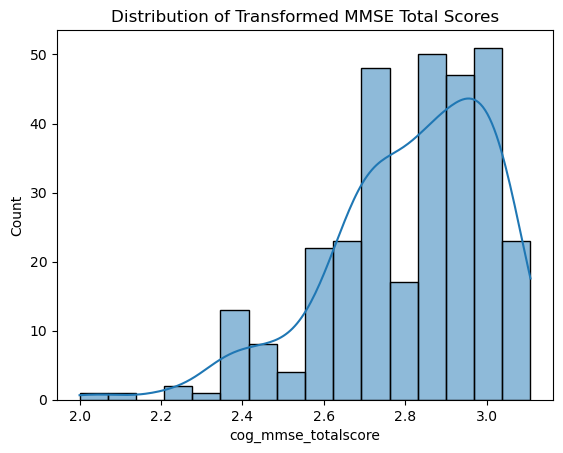

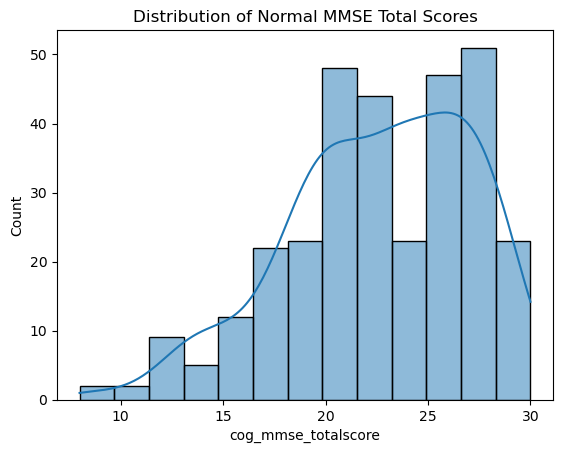

In [324]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.histplot(np.cbrt(meta["cog_mmse_totalscore"]), kde=True)
plt.title("Distribution of Transformed MMSE Total Scores")
plt.show()
sns.histplot(meta["cog_mmse_totalscore"], kde=True)
plt.title("Distribution of Normal MMSE Total Scores")
plt.show()


In [231]:
veillonella_asvs_tss_filtered = veillonella_asvs_tss.loc[:, veillonella_asvs_tss.mean() >= 0.005]
prevotella_asvs_tss_filtered = prevotella_asvs_tss.loc[:, prevotella_asvs_tss.mean() >= 0.005]
selon_asvs_tss_filtered = selon_asvs_tss.loc[:, selon_asvs_tss.mean() >= 0.005]
rothia_asvs_tss_filtered = rothia_asvs_tss.loc[:, rothia_asvs_tss.mean() >= 0.005]
abio_asvs_tss_filtered = abio_asvs_tss.loc[:, abio_asvs_tss.mean() >= 0.005]
capno_asvs_tss_filtered = capno_asvs_tss.loc[:, capno_asvs_tss.mean() >= 0.005]

#for genera
genus_veill_asvs_tss_filtered = genus_veill_asvs_tss.loc[:, genus_veill_asvs_tss.mean() >= 0.005]
genus_prevotella_asvs_tss_filtered = genus_prevotella_asvs_tss.loc[:, genus_prevotella_asvs_tss.mean() >= 0.005]
genus_selon_asvs_tss_filtered = genus_selon_asvs_tss.loc[:, genus_selon_asvs_tss.mean() >= 0.005]
genus_rothia_asvs_tss_filtered = genus_rothia_asvs_tss.loc[:, genus_rothia_asvs_tss.mean() >= 0.005]
genus_abiotrophia_asvs_tss_filtered = genus_abiotrophia_asvs_tss.loc[:, genus_abiotrophia_asvs_tss.mean() >= 0.005]
genus_capno_asvs_tss_filtered = genus_capno_asvs_tss.loc[:, genus_capno_asvs_tss.mean() >= 0.005]


In [232]:
genus_combined_asvs_tss_filtered = pd.concat([
    genus_veill_asvs_tss_filtered,
    genus_prevotella_asvs_tss_filtered,
    genus_selon_asvs_tss_filtered,
    #genus_rothia_asvs_tss_filtered,
    genus_abiotrophia_asvs_tss_filtered,
    genus_capno_asvs_tss_filtered
], axis=1)
genus_combined_asvs_tss_filtered

,0b0a4bdddb823efeb9984bf862fe81f8,28f6725fd27d82c88d036b99af9e7351,0e86d47168e5c995f8990779c9c5b51a,21b04aaabca0f92a5ba0a0b2eaa31aea,0c870b228c94b71c91663a829ef6f119,35791f882ef8d2b3177ac86ac87889b7,31b892624d1cb2eea6f31f253f272ee6,9989522015ac9ad21420cd95593a48c3,eae583b93b4f17caf4bdcc66c16fa257
0,0.044443,0.002814,0.010964,0.029152,0.026212,0.039654,0.014282,0.005587,0.001932
1,0.056711,0.006138,0.000000,0.076138,0.107228,0.000000,0.030707,0.000000,0.000249
2,0.122143,0.008361,0.000000,0.030631,0.049866,0.012763,0.024059,0.009688,0.127751
3,0.010204,0.000000,0.013454,0.105294,0.005941,0.002062,0.000000,0.000000,0.000000
4,0.120788,0.000000,0.000000,0.001500,0.000000,0.152079,0.022976,0.001876,0.000000
...,...,...,...,...,...,...,...,...,...
306,0.127157,0.005958,0.000000,0.000000,0.000000,0.234020,0.000000,0.010550,0.000000
307,0.000647,0.000000,0.004261,0.014941,0.000647,0.000000,0.000000,0.000000,0.000432
308,0.024473,0.002076,0.011680,0.093515,0.001891,0.000000,0.008454,0.036857,0.000000
309,0.002943,0.000000,0.013900,0.152464,0.000000,0.015215,0.001941,0.119341,0.049652


In [233]:
# Calculating the sum per row (total sequencing depth per sample)
sequencing_depth = asvs.sum(axis=1)
meta["Sequencing_Depth"] = sequencing_depth.values

In [249]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway

# Assuming your outcome variable is 'log_cog_mmse_totalscore'
outcome = meta['cog_mmse_totalscore']

# Initialize a DataFrame to store confounder results
possible_confounders = ['demogr_edu_level', 'Age',
       'Epigenetic_deviation', 'BMI', 'Group', 'Race_1_0', 'Race_2_0',
       'Race_3_0', 'Race_4.0', 'Sex_1_0', 'Sex_2.0', 'Smoking_0_0',
       'Smoking_1_0', 'Smoking_2.0', 'Sequencing_Depth']

confounders = []

# Loop through each column in the meta DataFrame
for col in meta[possible_confounders]:
    try:
        # Skip the index column
        if col == 'index':
            continue

        # Check if the variable is continuous or ordinal
        if meta[col].dtype in ['float64', 'int64']:
            # Continuous variable: Use Pearson correlation
            corr, p_value = pearsonr(meta[col], outcome)
        elif meta[col].nunique() <= 10:
            # Ordinal variable: Use Spearman correlation
            corr, p_value = spearmanr(meta[col], outcome)
        elif meta[col].nunique() <= 4:
            # Categorical variable: Use t-test (binary) or ANOVA (multiclass)
            unique_values = meta[col].unique()
            num_groups = len(unique_values)

            groups = [outcome[meta[col] == val] for val in meta[col].unique()]

            if num_groups == 2:
                # Binary categorical variable: Use t-test
                stat, p_value = ttest_ind(*groups)
            elif num_groups > 2:
                # Multiclass categorical variable: Use ANOVA
                stat, p_value = f_oneway(*groups)
            else:
                raise ValueError("The categorical variable must have at least two groups.")

            #stat, p_value = ttest_ind(*groups)

        # If p-value is significant, add it to the confounders list
        if p_value < 0.05:
            confounders.append({'Variable': col, 'P-Value': p_value})

    except Exception as e:
        print(f"Error processing column {col}: {e}")

# Convert confounders list to DataFrame
confounders_df = pd.DataFrame(confounders)

# Apply FDR correction
p_values = confounders_df['P-Value']
fdr_corrected = multipletests(p_values, method='fdr_bh')

# Add corrected p-values to the DataFrame
confounders_df['FDR Corrected P-Value'] = fdr_corrected[1]
confounders_df['Significant (FDR)'] = fdr_corrected[0]

# Sort by corrected p-value
confounders_df.sort_values(by='FDR Corrected P-Value', inplace=True)

# Display the corrected results
confounders_df


,Variable,P-Value,FDR Corrected P-Value,Significant (FDR)
0,demogr_edu_level,5.707571e-14,3.424543e-13,True
2,Sex_1_0,4.300565e-10,8.601130e-10,True
3,Sex_2.0,4.300565e-10,8.601130e-10,True
5,Smoking_2.0,4.351205e-04,6.526807e-04,True
4,Smoking_0_0,8.289209e-03,9.947050e-03,True
1,Race_2_0,3.924823e-02,3.924823e-02,True


In [245]:
#top10_asvs, top5_comm_asvs, simper_asvs, connected_pcs
#top10_asvs_tss, top5_comm_asvs_tss, simper_asvs_tss, connected_taxa_tss, connected_pcs veillonella_asvs_tss_filtered
confounders = ["Sex_1_0", "Smoking_2.0", 'Smoking_0_0', 'demogr_edu_level', 'Race_2_0']
combined_asvs = pd.concat([prevotella_asvs_tss_filtered, veillonella_asvs_tss_filtered, connected_taxa_tss, meta[confounders]], axis=1)
#combined_asvs = pd.concat([genus_combined_asvs_tss_filtered, connected_taxa_tss, meta[confounders]], axis=1)
combined_asvs.columns = combined_asvs.columns.astype(str)


In [246]:
import statsmodels.api as sm

# Prepare the outcome variable
y = meta['cog_mmse_totalscore']

# Add a constant term to the model (intercept)
X = sm.add_constant(combined_asvs)

# Fit a GLM with Gaussian family and robust errors
model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Get the summary with p-values
print(model.summary())



                  Generalized Linear Model Regression Results                  
Dep. Variable:     cog_mmse_totalscore   No. Observations:                  311
Model:                             GLM   Df Residuals:                      284
Model Family:                 Gaussian   Df Model:                           26
Link Function:                Identity   Scale:                          14.756
Method:                           IRLS   Log-Likelihood:                -845.72
Date:                 Fri, 10 Jan 2025   Deviance:                       4190.8
Time:                         20:42:23   Pearson chi2:                 4.19e+03
No. Iterations:                      3   Pseudo R-squ. (CS):             0.3623
Covariance Type:             nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [247]:
from statsmodels.stats.multitest import multipletests

# Extract p-values
p_values = model.pvalues

# Apply Benjamini-Hochberg correction (FDR control)
adjusted_pvals = multipletests(p_values, method='fdr_bh')[1]

# Create a DataFrame with coefficients and adjusted p-values
significant_results = pd.DataFrame({
    'Predictor': p_values.index,
    'Coefficient': model.params.values,
    'P-Value': p_values.values,
    'Adjusted P-Value': adjusted_pvals
})

# Filter significant predictors at an adjusted p-value threshold of 0.05
significant_results_filtered = significant_results[significant_results['Adjusted P-Value'] <= 0.05]
significant_results_filtered



,Predictor,Coefficient,P-Value,Adjusted P-Value
0,const,15.715873,6.381847e-36,1.723099e-34
1,21b04aaabca0f92a5ba0a0b2eaa31aea,11.671515,1.475556e-02,4.980003e-02
6,22e08646a28fd92f3b5f917d15775428,-46.481084,9.896827e-03,4.793704e-02
7,9989522015ac9ad21420cd95593a48c3,30.251972,1.242812e-02,4.793704e-02
22,Sex_1_0,1.940829,1.618858e-03,1.193544e-02
23,Smoking_2.0,3.143728,1.768213e-03,1.193544e-02
24,Smoking_0_0,2.477780,1.123670e-02,4.793704e-02
25,demogr_edu_level,1.896667,2.955604e-09,3.990065e-08


In [111]:
import pandas as pd
import io

# Convert `model.summary()` to a string
summary_text = model.summary().as_text()

# Use `io.StringIO` to treat the text as a file-like object
summary_io = io.StringIO(summary_text)

# Read the summary text into a DataFrame
summary_df = pd.read_csv(summary_io, sep="\t", header=None)

# Create an Excel writer
#with pd.ExcelWriter("MMSE_Model.xlsx") as writer:
    # Write the model summary
    #summary_df.to_excel(writer, sheet_name="Model Summary", index=False, header=False)
    # Write the significant results
    #significant_results_filtered.to_excel(writer, sheet_name="Significant Results", index=False)


In [114]:
df = significant_results_filtered.iloc[1:4,:].reset_index(drop=True)

# Calculate mean and std for each predictor (column) in asvs_tss
abundance_stats = asv_tss.agg(['mean', 'std']).transpose().reset_index()
abundance_stats.columns = ['Predictor', 'Mean_Abundance', 'Std_Abundance']

# Merge the stats with your df on the Predictor column
df = df.merge(abundance_stats, on='Predictor', how='left')

# Calculate percentiles for each predictor in asvs_tss
percentiles = asv_tss.quantile([0.1, 0.9]).transpose().reset_index()
percentiles.columns = ['Predictor', '10_perc_abund', '90_perc_abund']

# Merge the percentiles back into your df
df = df.merge(percentiles, on='Predictor', how='left')

# Calculate the realistic increase in abundance from the median to the 90th percentile
df['Realistic_Abundance_Increase'] = df['90_perc_abund'] - df['10_perc_abund']
df['Realistic_MMSE_Increase'] = df['Realistic_Abundance_Increase'] * df["Coefficient"]

df

,Predictor,Coefficient,P-Value,Adjusted P-Value,Mean_Abundance,Std_Abundance,10_perc_abund,90_perc_abund,Realistic_Abundance_Increase,Realistic_MMSE_Increase
0,21b04aaabca0f92a5ba0a0b2eaa31aea,11.671515,0.014756,0.049800,0.059331,0.052879,0.0015,0.135707,0.134206,1.566390
1,22e08646a28fd92f3b5f917d15775428,-46.481084,0.009897,0.047937,0.011985,0.013728,0.0000,0.030708,0.030708,-1.427336
2,9989522015ac9ad21420cd95593a48c3,30.251972,0.012428,0.047937,0.008538,0.019378,0.0000,0.029572,0.029572,0.894607


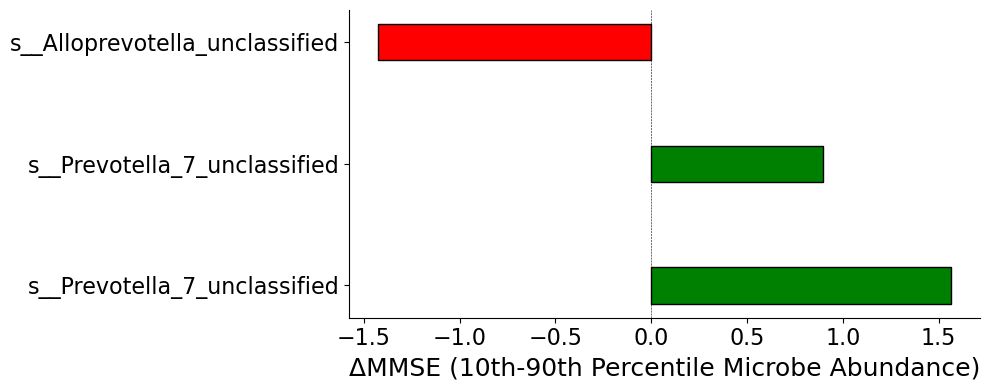

In [115]:
# Replace predictor names in df with corresponding species names from simper
df["Predictor_species"] = df["Predictor"].map(simper.set_index("ASV")["Species"])

# Sort by MMSE change to make the plot cleaner
df = df.sort_values(by="Realistic_MMSE_Increase", ascending=False).reset_index(drop=True)

#df.to_csv("significant_mmse_predictors.csv")

# Plot
fig, ax = plt.subplots(figsize=(10, 4))

# Color bars based on positive/negative MMSE changes
colors = ['green' if val > 0 else 'red' for val in df["Realistic_MMSE_Increase"]]

# Use the DataFrame index for the y-axis labels to avoid collapsing duplicates
bars = ax.barh(df.index, df["Realistic_MMSE_Increase"], color=colors, edgecolor='black', height=0.3)

# Set y-axis labels to the species names
ax.set_yticks(df.index)
ax.set_yticklabels(df["Predictor_species"], fontsize = 18)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Add labels and lines
ax.axvline(0, color='black', linestyle='--', linewidth=0.4)
ax.set_xlabel("ΔMMSE (10th-90th Percentile Microbe Abundance)", fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout for cleanliness
plt.tight_layout()

#plt.savefig("MMSE_Change.png", format="png", dpi=600)

# Display the plot
plt.show()


In [409]:
simper.sort_values(by='average', ascending=False)

,average,sd,ratio,ava,avb,cumsum,p,neg_log_p,Species,Genus,Family,ASV,mean_abundance
0,3.538734e-02,0.045032,0.785832,8.716865e-02,0.072091,0.047681,0.053,1.275724,s__Streptococcus_pneumoniae,g__Streptococcus,f__Streptococcaceae,d0ab2c15400fe710288526c9a33083fb,7.962967e-02
1,2.848475e-02,0.024661,1.155059,5.223646e-02,0.066472,0.086061,0.011,1.958607,s__Prevotella_7_unclassified,g__Prevotella_7,f__Prevotellaceae,21b04aaabca0f92a5ba0a0b2eaa31aea,5.935424e-02
2,2.658153e-02,0.022105,1.202503,5.408071e-02,0.059691,0.121876,0.016,1.795880,s__Veillonella_unclassified,g__Veillonella,f__Veillonellaceae,0b0a4bdddb823efeb9984bf862fe81f8,5.688610e-02
3,1.905443e-02,0.017797,1.070662,3.904127e-02,0.027285,0.147550,0.011,1.958607,s__uncultured_Haemophilus_sp.,g__Haemophilus,f__Pasteurellaceae,c13359a9f895b1a2b9fcf49ceaea0e8a,3.316315e-02
4,1.781412e-02,0.022990,0.774858,2.086377e-02,0.028679,0.171553,0.044,1.356547,s__Prevotella_7_unclassified,g__Prevotella_7,f__Prevotellaceae,0c870b228c94b71c91663a829ef6f119,2.477130e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,9.344397e-08,0.000001,0.080320,1.868879e-07,0.000000,1.000000,0.001,3.000000,s__Ruminococcaceae_UCG-003_unclassified,g__Ruminococcaceae_UCG-003,f__Ruminococcaceae,83a33742385204c2b3e2c250b6e97050,9.344397e-08
11810,9.344397e-08,0.000001,0.080320,1.868879e-07,0.000000,1.000000,0.001,3.000000,s__Bergeyella_unclassified,g__Bergeyella,f__Weeksellaceae,ee931404df61f94a50909ebc684686be,9.344397e-08
11811,9.344397e-08,0.000001,0.080320,1.868879e-07,0.000000,1.000000,0.001,3.000000,s__Alloprevotella_unclassified,g__Alloprevotella,f__Prevotellaceae,92a55ef19d4202dcaec8996ed22c6f57,9.344397e-08
11812,8.852478e-08,0.000001,0.080320,1.770496e-07,0.000000,1.000000,0.001,3.000000,s__Pasteurellales_unclassified,g__Pasteurellales_unclassified,f__Pasteurellales_unclassified,c18f151e8caad1a386386decc076faf0,8.852478e-08


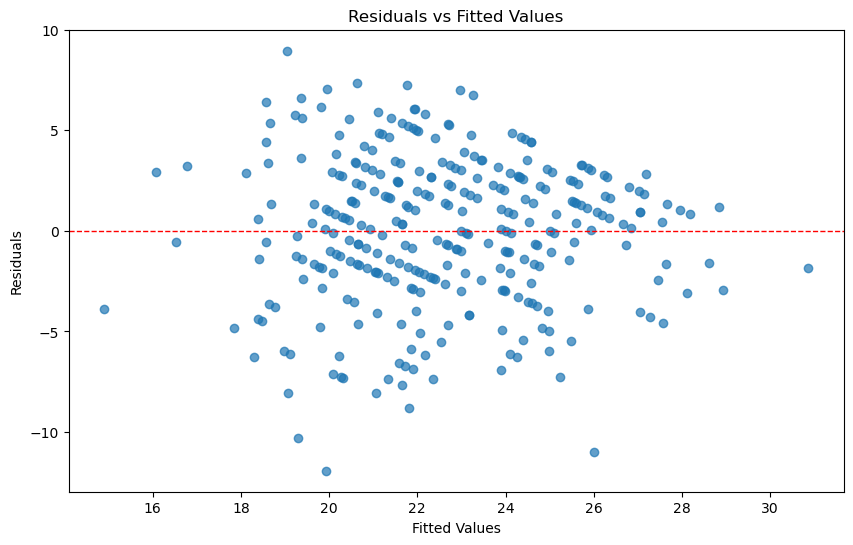

In [333]:
import matplotlib.pyplot as plt

# Get residuals
residuals = model.resid_response

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()



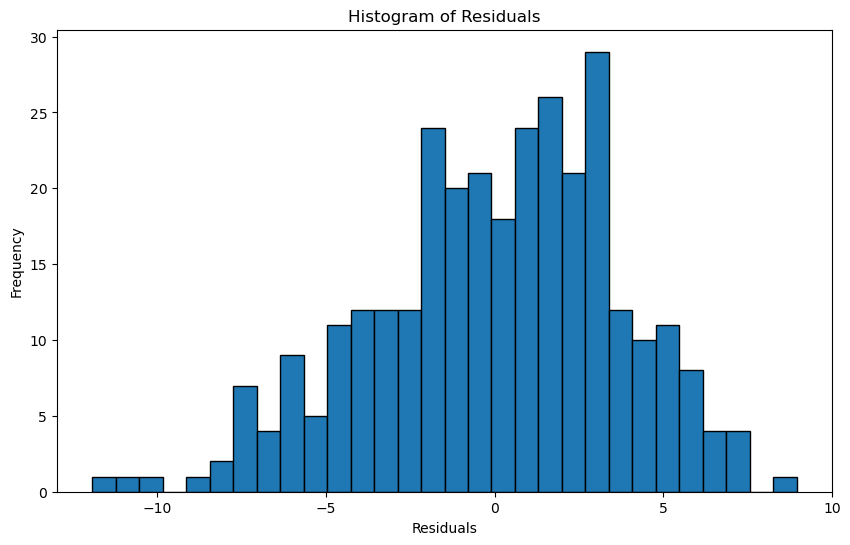

In [334]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [426]:
df

,Predictor,Coefficient,P-Value,Adjusted P-Value,Coefficient_0.1_increase,Mean_Abundance,Std_Abundance,10_perc_abund,90_perc_abund,Realistic_Abundance_Increase,Realistic_MMSE_Increase,Predictor_species
0,21b04aaabca0f92a5ba0a0b2eaa31aea,11.671497,0.014756,0.049801,1.167150,0.059331,0.052879,1.500459e-03,0.135707,0.134206,1.566387,s__Prevotella_7_unclassified
1,9989522015ac9ad21420cd95593a48c3,30.252015,0.012428,0.047937,3.025202,0.008538,0.019378,0.000000e+00,0.029572,0.029572,0.894608,s__Prevotella_7_unclassified
2,22e08646a28fd92f3b5f917d15775428,-46.481409,0.009897,0.047937,-4.648141,0.011985,0.013728,1.734736e-09,0.030708,0.030708,-1.427346,s__Alloprevotella_unclassified


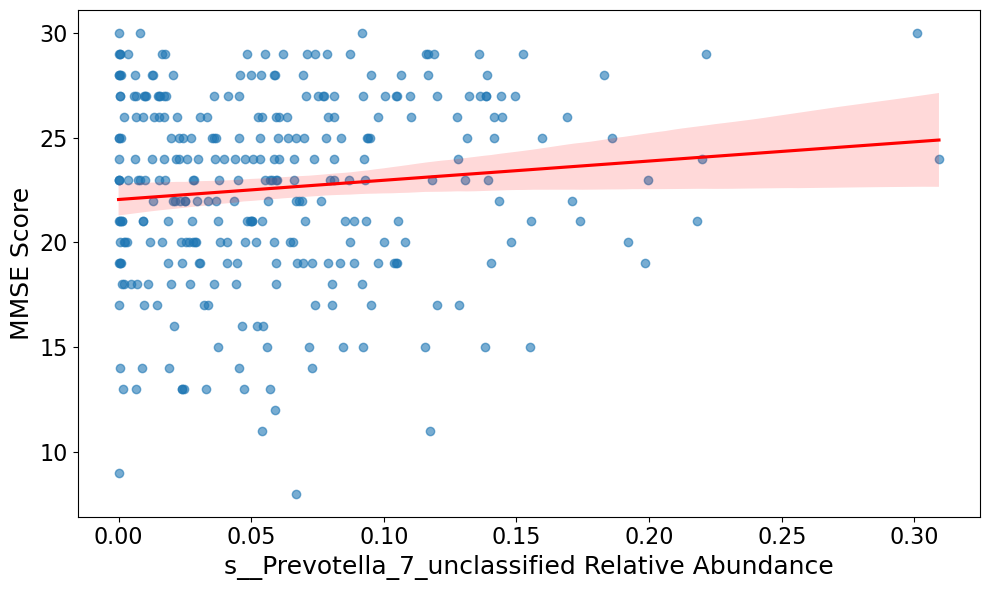

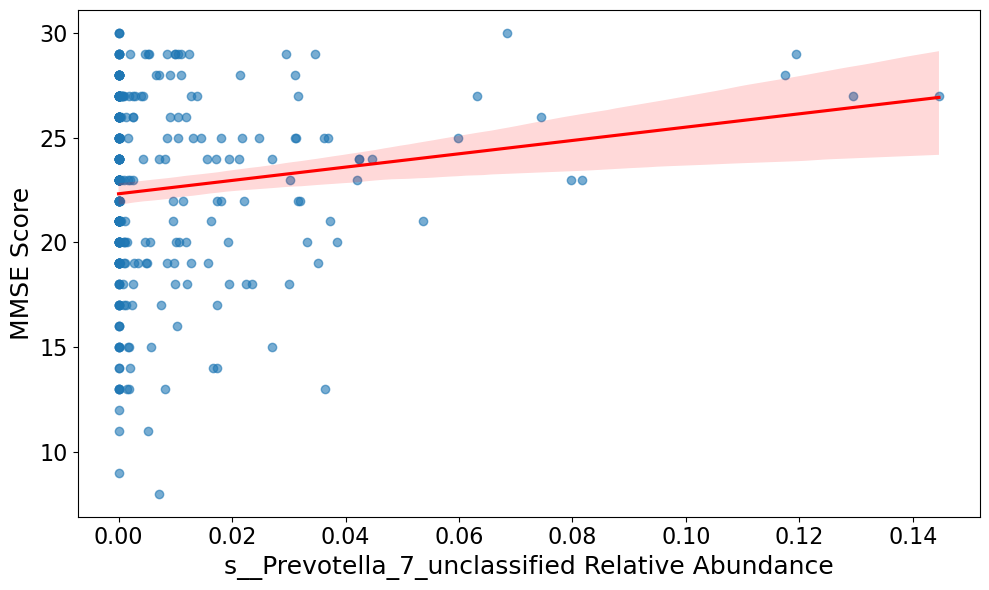

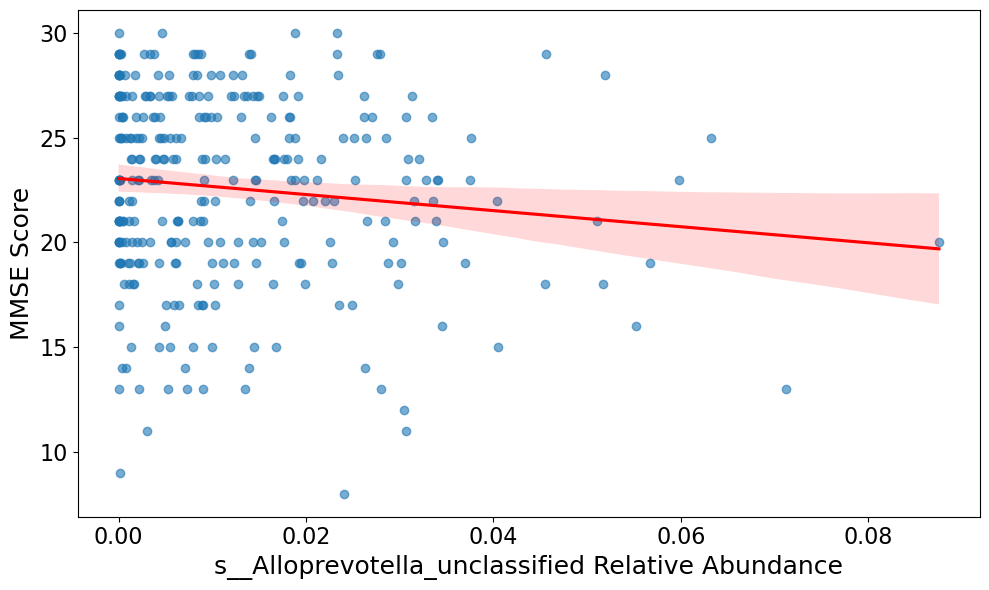

In [431]:

# Ensure species names are used for plot labels
for predictor, species in zip(df["Predictor"], df["Predictor_species"]):
    plt.figure(figsize=(10, 6))

    # Plot regression for each significant predictor
    sns.regplot(
        x=asv_tss[predictor],
        y=meta["cog_mmse_totalscore"],
        scatter_kws={"alpha": 0.6},
        line_kws={"color": "red"}
    )
    
    # Use the species name for the x-axis label
    plt.xlabel(species + " Relative Abundance", fontsize=18)
    plt.ylabel("MMSE Score", fontsize=18)

    # Adjust tick label sizes
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Adjust layout for cleanliness
    plt.tight_layout()

    # Save each plot as a PNG for publication
    plt.savefig(f"regression_plot_{predictor.replace(' ', '_')}.png", format="png", dpi=600)
    plt.show()


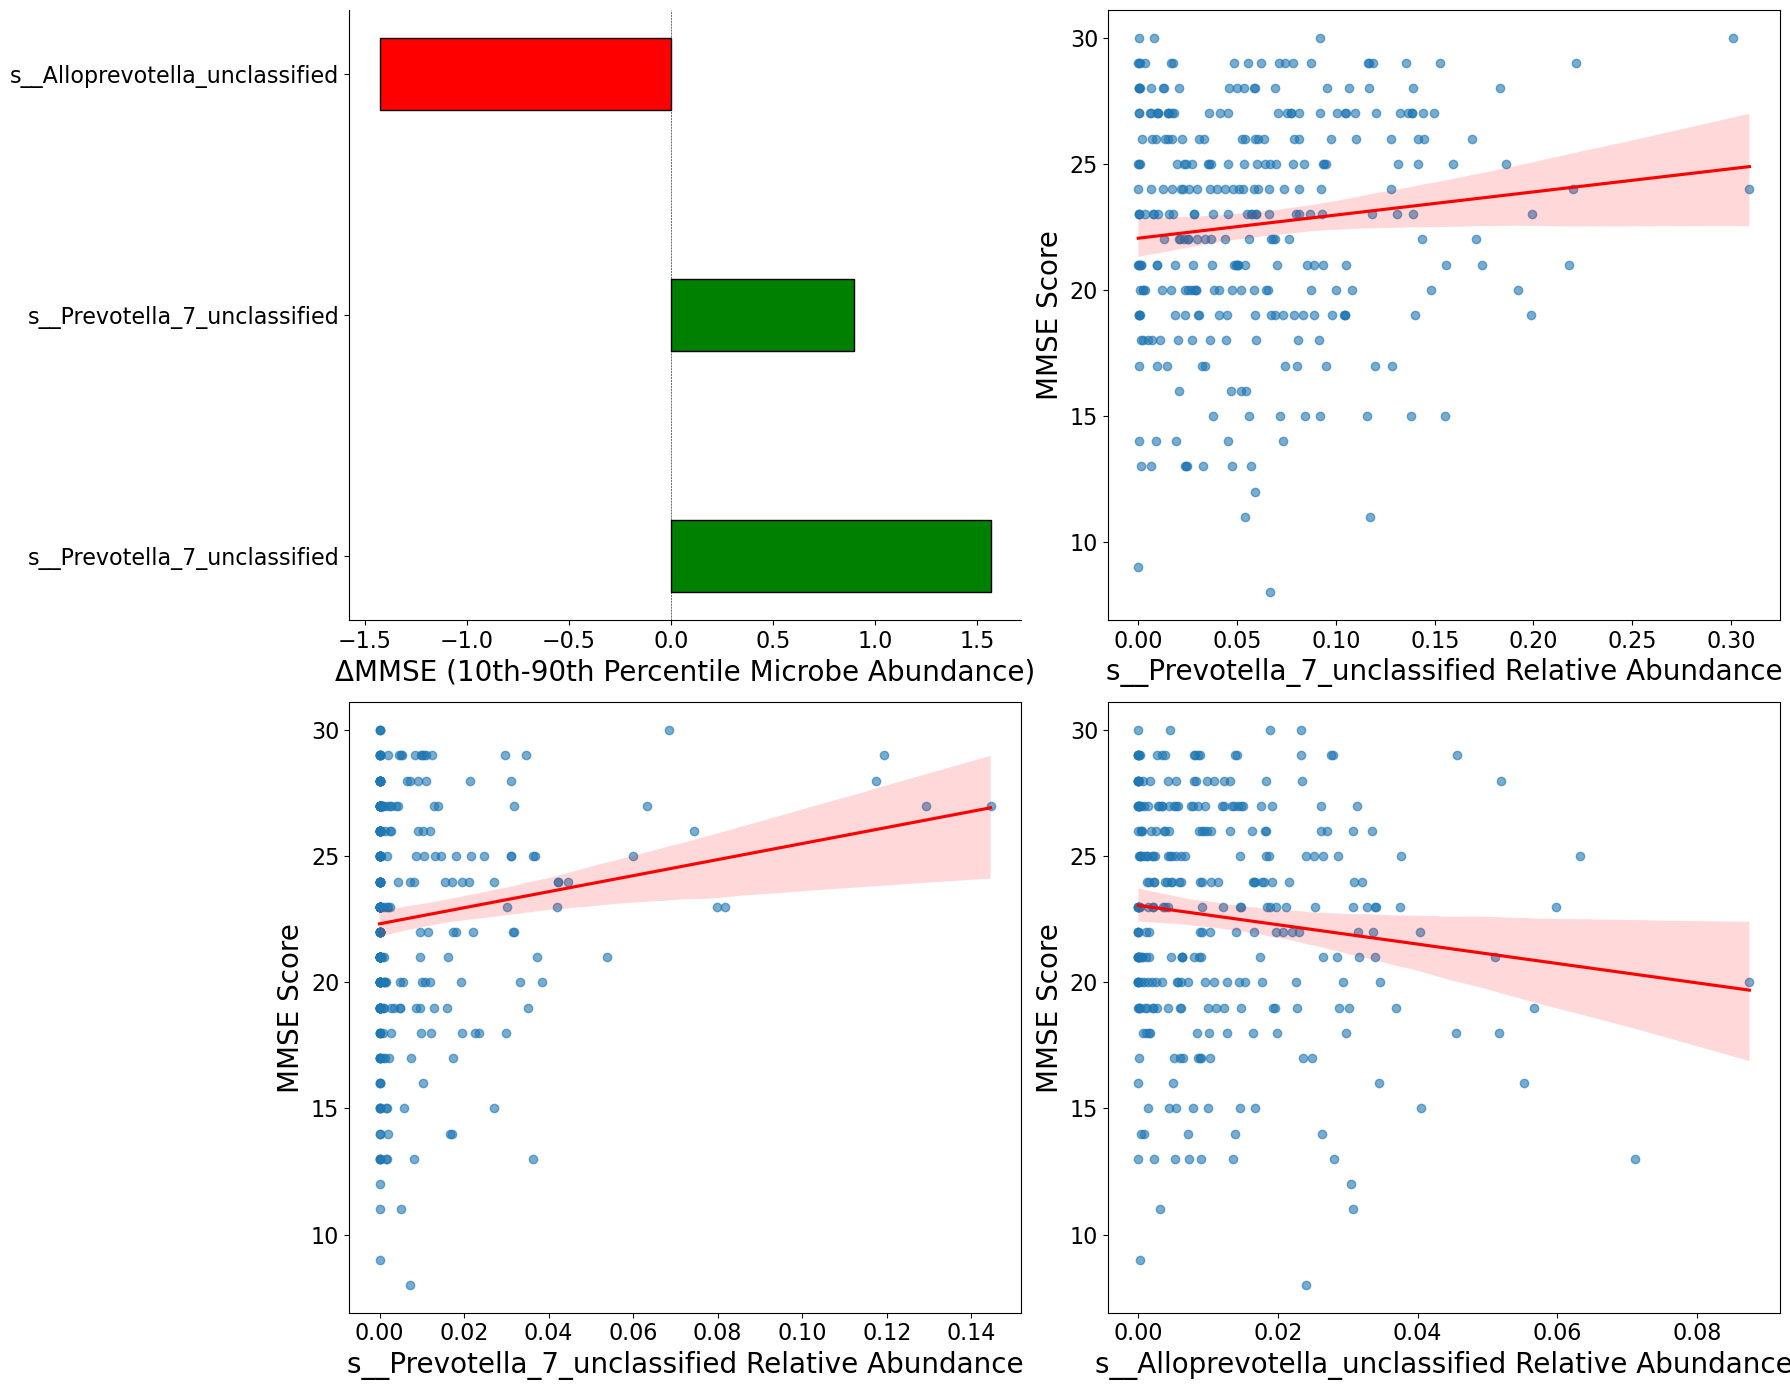

In [438]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use species names for the plots instead of ASVs
df["Predictor_species"] = df["Predictor"].map(simper.set_index("ASV")["Species"])

# Sort by MMSE change to make the plot cleaner
df = df.sort_values(by="Realistic_MMSE_Increase", ascending=False).reset_index(drop=True)

# Save the DataFrame to CSV
df.to_csv("significant_mmse_predictors.csv")

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# --- Plot 1: Bar plot for MMSE Change ---
ax = axs[0, 0]

# Color bars based on positive/negative MMSE changes
colors = ['green' if val > 0 else 'red' for val in df["Realistic_MMSE_Increase"]]

# Use the DataFrame index for the y-axis labels to avoid collapsing duplicates
bars = ax.barh(df.index, df["Realistic_MMSE_Increase"], color=colors, edgecolor='black', height=0.3)

# Set y-axis labels to the species names
ax.set_yticks(df.index)
ax.set_yticklabels(df["Predictor_species"], fontsize=20)

# Add labels and lines
ax.axvline(0, color='black', linestyle='--', linewidth=0.4)
ax.set_xlabel("ΔMMSE (10th-90th Percentile Microbe Abundance)", fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Plot 2, 3, 4: Regression plots for significant predictors ---
for idx, (predictor, species) in enumerate(zip(df["Predictor"], df["Predictor_species"]), start=1):
    if idx > 3:
        break
    ax = axs[(idx // 2), (idx % 2)]
    sns.regplot(
        x=asv_tss[predictor],
        y=meta["cog_mmse_totalscore"],
        ax=ax,
        scatter_kws={"alpha": 0.6},
        line_kws={"color": "red"}
    )
    ax.set_xlabel(f"{species} Relative Abundance", fontsize=20)
    ax.set_ylabel("MMSE Score", fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

# Adjust layout for cleanliness
plt.tight_layout()

# Save the plot as a high-quality PNG
plt.savefig("MMSE_Combined_Plot.png", format="png", dpi=600)

# Display the plot
plt.show()


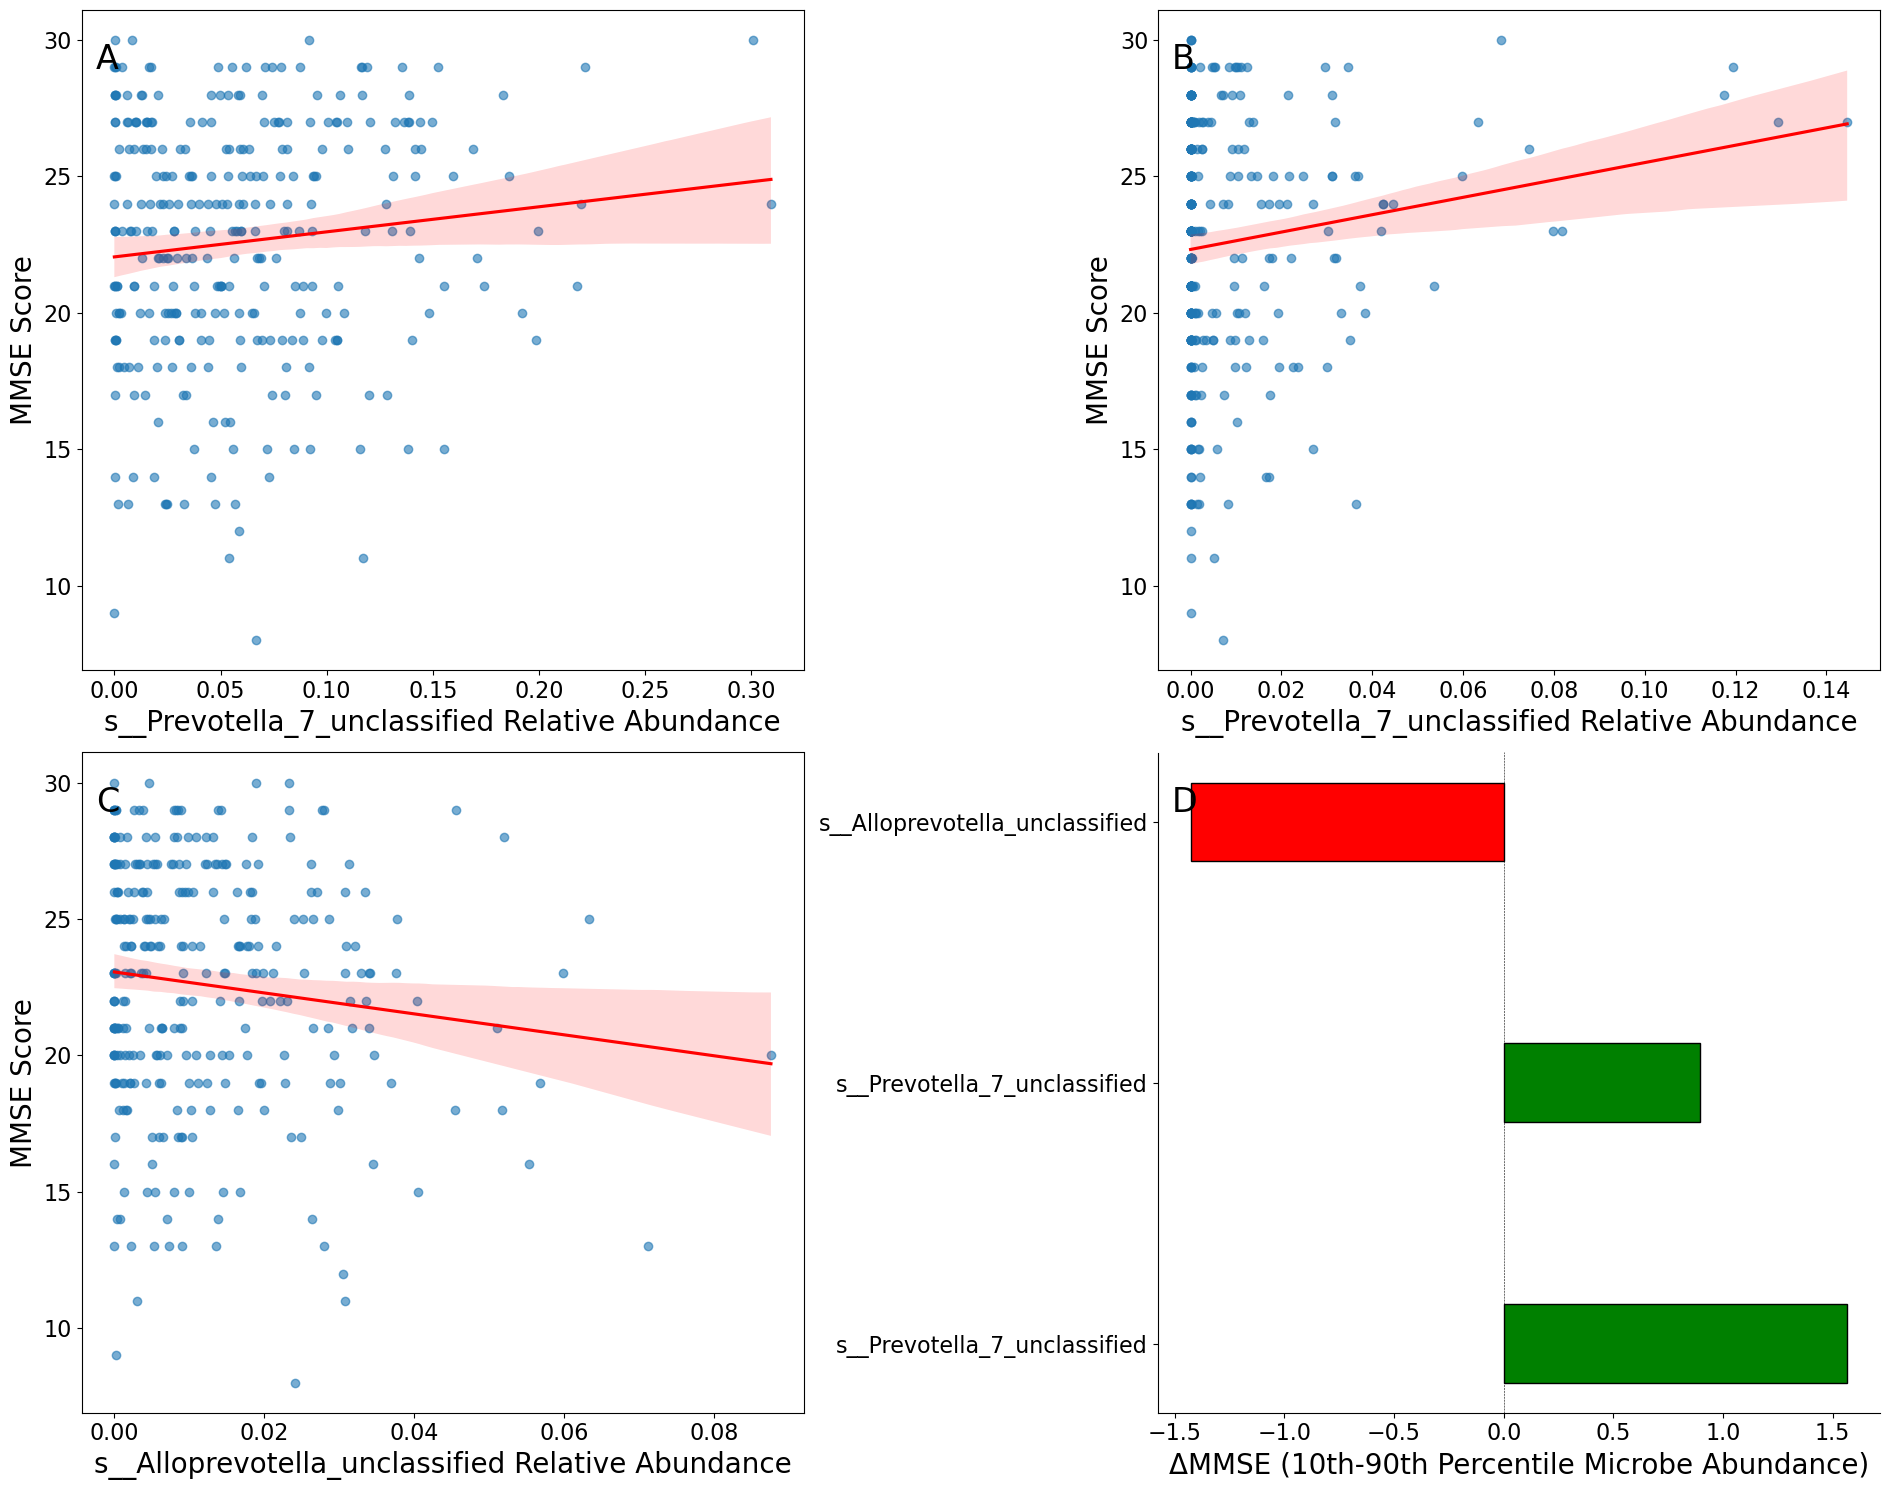

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df', 'simper', 'asv_tss', and 'meta' are predefined DataFrames

# Use species names for the plots instead of ASVs
df["Predictor_species"] = df["Predictor"].map(simper.set_index("ASV")["Species"])

# Sort by MMSE change to make the plot cleaner
df = df.sort_values(by="Realistic_MMSE_Increase", ascending=False).reset_index(drop=True)

# Save the DataFrame to CSV
df.to_csv("significant_mmse_predictors.csv", index=False)

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(19, 15))

# Define plot labels
plot_labels = ['A', 'B', 'C', 'D']

# Flatten the axs array for easy indexing
axs_flat = axs.flatten()

# --- Plots 1, 2, 3: Regression plots for significant predictors ---
for idx, (predictor, species) in enumerate(zip(df["Predictor"], df["Predictor_species"])):
    if idx >= 3:
        break  # Only create three regression plots
    ax = axs_flat[idx]
    sns.regplot(
        x=asv_tss[predictor],
        y=meta["cog_mmse_totalscore"],
        ax=ax,
        scatter_kws={"alpha": 0.6},
        line_kws={"color": "red"}
    )
    ax.set_xlabel(f"{species} Relative Abundance", fontsize=20)
    ax.set_ylabel("MMSE Score", fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # Add label to the upper left corner
    ax.text(0.02, 0.95, plot_labels[idx], transform=ax.transAxes,
            fontsize=24, fontweight='light', va='top', ha='left')

# --- Plot 4: Bar plot for MMSE Change ---
ax_bar = axs_flat[3]

# Color bars based on positive/negative MMSE changes
colors = ['green' if val > 0 else 'red' for val in df["Realistic_MMSE_Increase"]]

# Use the DataFrame index for the y-axis labels to avoid collapsing duplicates
bars = ax_bar.barh(df.index, df["Realistic_MMSE_Increase"], color=colors, edgecolor='black', height=0.3)

# Set y-axis labels to the species names
ax_bar.set_yticks(df.index)
ax_bar.set_yticklabels(df["Predictor_species"], fontsize=20)

# Add labels and lines
ax_bar.axvline(0, color='black', linestyle='--', linewidth=0.4)
ax_bar.set_xlabel("ΔMMSE (10th-90th Percentile Microbe Abundance)", fontsize=20)
ax_bar.tick_params(axis='x', labelsize=16)
ax_bar.tick_params(axis='y', labelsize=16)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)

# Add label to the upper left corner of the bar plot
ax_bar.text(0.02, 0.95, plot_labels[3], transform=ax_bar.transAxes,
            fontsize=24, fontweight='light', va='top', ha='left')

# Adjust layout for cleanliness
plt.tight_layout()

# Save the plot as a high-quality PNG
#plt.savefig("MMSE_Combined_Plot.png", format="png", dpi=600)

# Display the plot
plt.show()


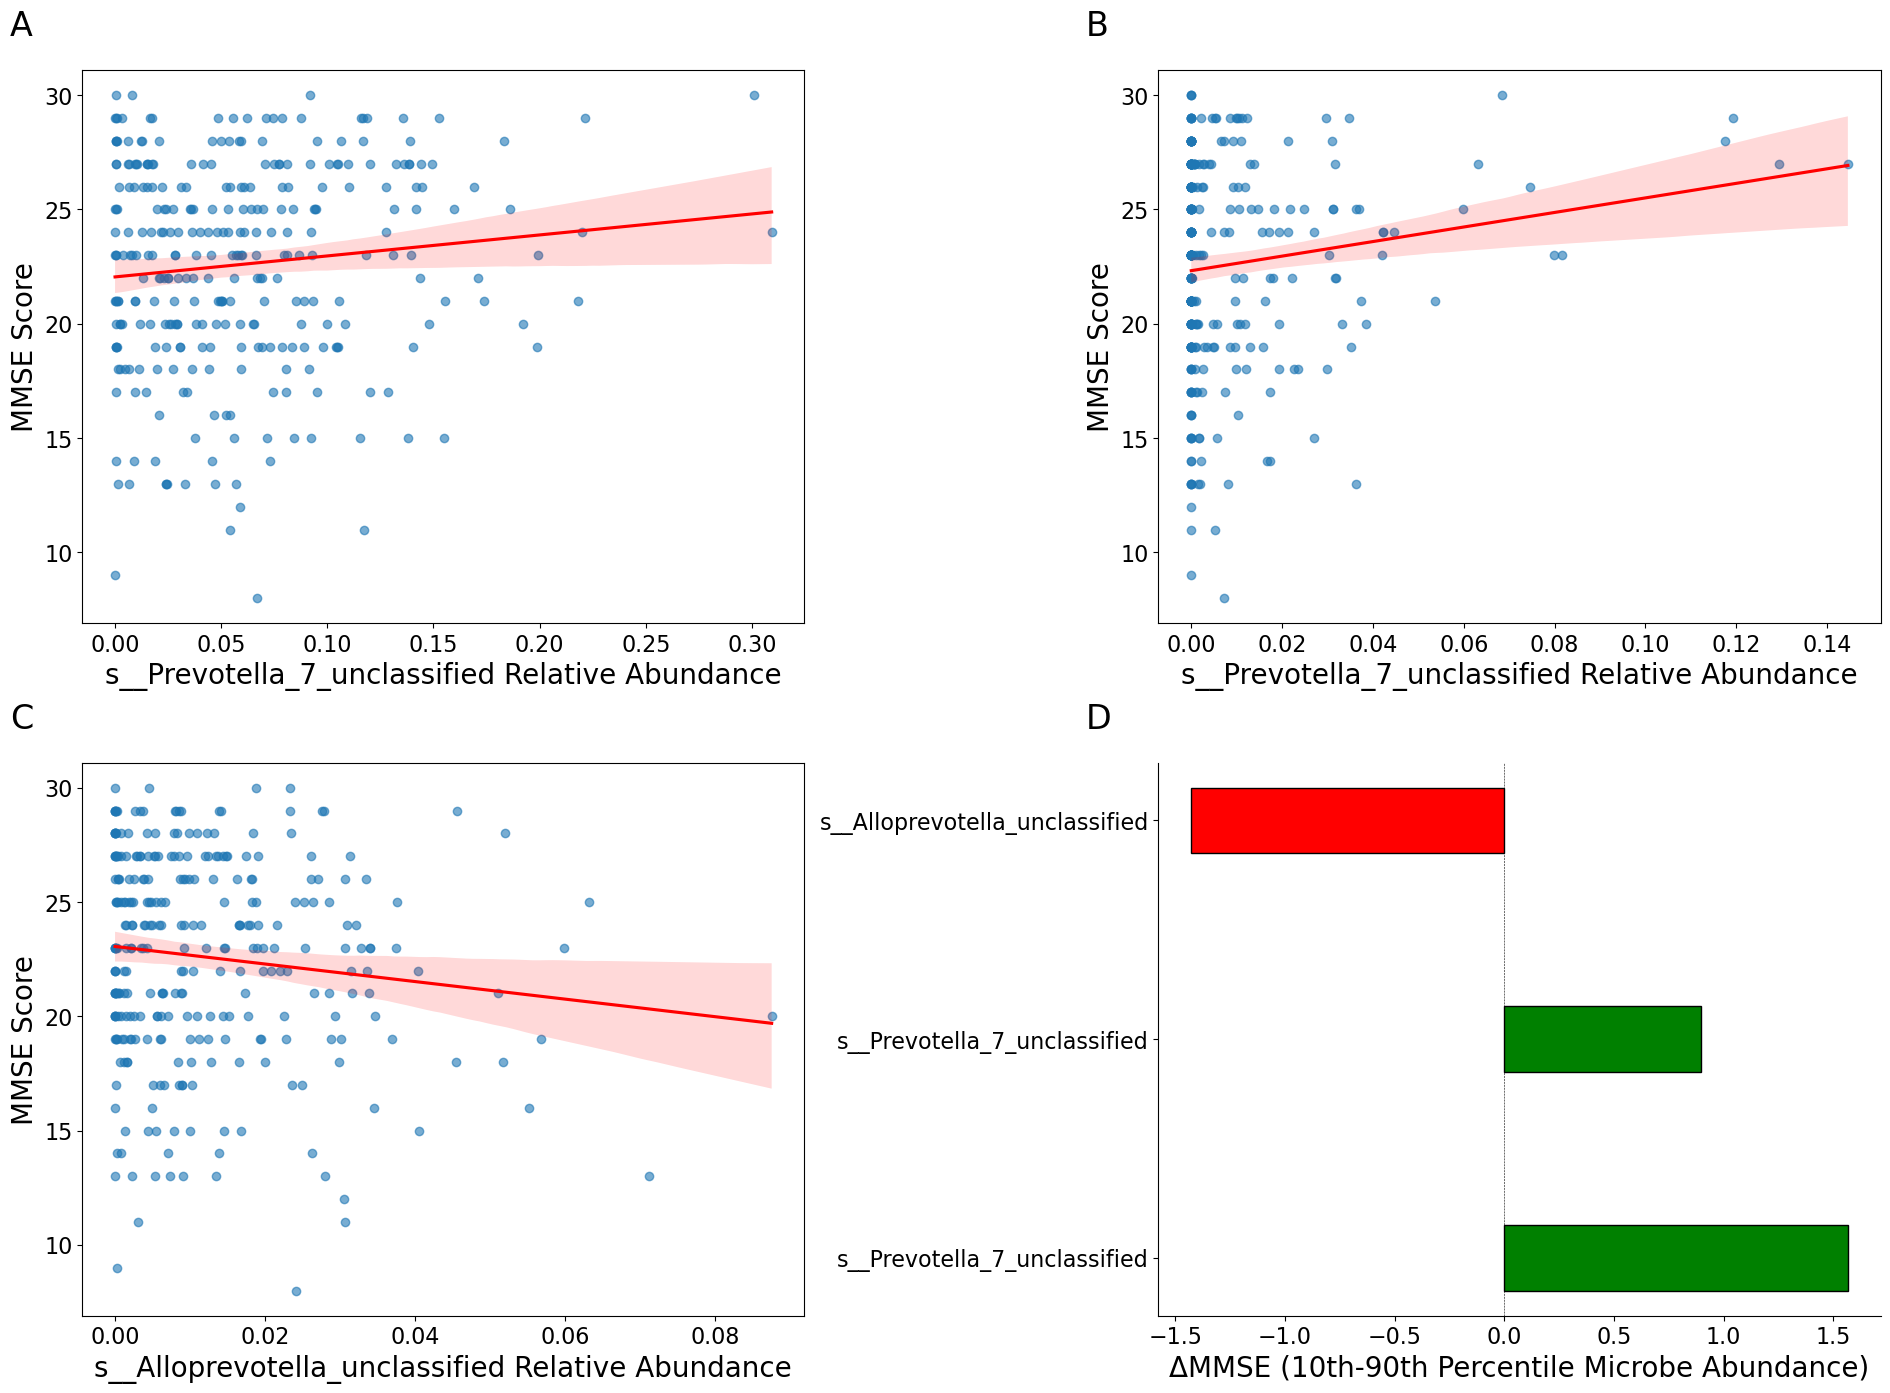

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df', 'simper', 'asv_tss', and 'meta' are predefined DataFrames

# Use species names for the plots instead of ASVs
df["Predictor_species"] = df["Predictor"].map(simper.set_index("ASV")["Species"])

# Sort by MMSE change to make the plot cleaner
df = df.sort_values(by="Realistic_MMSE_Increase", ascending=False).reset_index(drop=True)

# Save the DataFrame to CSV
df.to_csv("significant_mmse_predictors.csv", index=False)

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(19, 14))

# Define plot labels
plot_labels = ['A', 'B', 'C', 'D']

# Flatten the axs array for easy indexing
axs_flat = axs.flatten()

# --- Plots 1, 2, 3: Regression plots for significant predictors ---
for idx, (predictor, species) in enumerate(zip(df["Predictor"], df["Predictor_species"])):
    if idx >= 3:
        break  # Only create three regression plots
    ax = axs_flat[idx]
    sns.regplot(
        x=asv_tss[predictor],
        y=meta["cog_mmse_totalscore"],
        ax=ax,
        scatter_kws={"alpha": 0.6},
        line_kws={"color": "red"}
    )
    ax.set_xlabel(f"{species} Relative Abundance", fontsize=20)
    ax.set_ylabel("MMSE Score", fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # Add label above the plot (outside)
    ax.text(-0.1, 1.05, plot_labels[idx], transform=ax.transAxes,
            fontsize=24, fontweight='light', va='bottom', ha='left')

# --- Plot 4: Bar plot for MMSE Change ---
ax_bar = axs_flat[3]

# Color bars based on positive/negative MMSE changes
colors = ['green' if val > 0 else 'red' for val in df["Realistic_MMSE_Increase"]]

# Use the DataFrame index for the y-axis labels to avoid collapsing duplicates
bars = ax_bar.barh(df.index, df["Realistic_MMSE_Increase"], color=colors, edgecolor='black', height=0.3)

# Set y-axis labels to the species names
ax_bar.set_yticks(df.index)
ax_bar.set_yticklabels(df["Predictor_species"], fontsize=20)

# Add labels and lines
ax_bar.axvline(0, color='black', linestyle='--', linewidth=0.4)
ax_bar.set_xlabel("ΔMMSE (10th-90th Percentile Microbe Abundance)", fontsize=20)
ax_bar.tick_params(axis='x', labelsize=16)
ax_bar.tick_params(axis='y', labelsize=16)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)

# Add label above the bar plot (outside)
ax_bar.text(-0.1, 1.05, plot_labels[3], transform=ax_bar.transAxes,
            fontsize=24, fontweight='light', va='bottom', ha='left')

# Adjust layout to make space for the labels
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)

plt.tight_layout()

# Save the plot as a high-quality PNG
plt.savefig("MMSE_Combined_Plot.png", format="png", dpi=600, bbox_inches='tight')

# Display the plot
plt.show()
